## Predict the Quality of Red wine


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,id,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,5


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1120 entries, 0 to 1119
Data columns (total 13 columns):
id                      1120 non-null int64
fixed.acidity           1120 non-null float64
volatile.acidity        1120 non-null float64
citric.acid             1120 non-null float64
residual.sugar          1120 non-null float64
chlorides               1120 non-null float64
free.sulfur.dioxide     1120 non-null float64
total.sulfur.dioxide    1120 non-null int64
density                 1120 non-null float64
pH                      1120 non-null float64
sulphates               1120 non-null float64
alcohol                 1120 non-null float64
quality                 1120 non-null int64
dtypes: float64(10), int64(3)
memory usage: 113.9 KB


In [4]:
train.describe()

,id,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000
mean,560.500000,8.675357,0.521772,0.295714,2.579196,0.089700,15.200000,47.150893,0.997163,3.296661,0.665455,10.336518,5.650000
std,323.460456,1.797024,0.178929,0.198923,1.276932,0.048789,10.083973,34.209149,0.001857,0.156439,0.178187,1.076716,0.810344
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,280.750000,7.400000,0.390000,0.120000,1.900000,0.072000,7.000000,22.000000,0.996193,3.190000,0.560000,9.500000,5.000000
50%,560.500000,8.300000,0.510000,0.285000,2.275000,0.081000,13.000000,38.000000,0.997200,3.300000,0.620000,10.000000,6.000000
75%,840.250000,9.700000,0.630000,0.470000,2.700000,0.092250,21.000000,63.000000,0.998200,3.390000,0.730000,11.000000,6.000000
max,1120.000000,15.900000,1.330000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003200,3.900000,2.000000,14.900000,8.000000


In [5]:
columns = list(train.columns)
new_name = []
for col in columns:
    new_name.append(col.replace('.', '_'))
train.columns = new_name
train.columns

Index(['id', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

### Distribution of Target Attribute

In [6]:
totalquality_Count = train['quality'].value_counts()
qt_counts = pd.DataFrame({'Quality': list(totalquality_Count.index), 'total_Frequency': totalquality_Count})
qt_counts

,Quality,total_Frequency
5,5,494
6,6,420
7,7,157
4,4,32
8,8,12
3,3,5


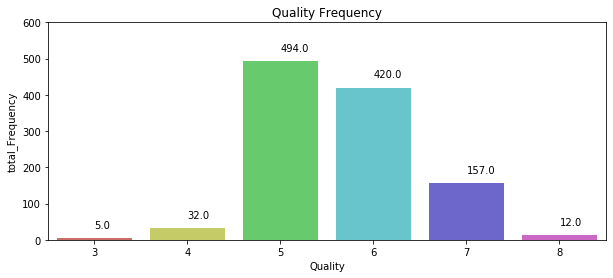

In [7]:
plt.figure(figsize=(10,4))
pty = sns.barplot(x='Quality', y='total_Frequency', data=qt_counts, capsize=0.3, palette="hls")
pty.set_title("Quality Frequency")
pty.set_yticks([0,100,200,300,400,500,600])
for val in pty.patches:
    pty.annotate(np.round(val.get_height(),decimals=2), 
                (val.get_x()+val.get_width()/2, val.get_height()), 
                xytext=(0, 10), 
                textcoords='offset points')


##### Analysis
Based on above data
<ul>
    <li>Quality ranges from 3 - 8 </li>    
    <li>There is too much variation in data, where 5 and 6 has most no. of data point and 3 and 8 has very less. </li>
</ul>

In [8]:
#Droping irrerelavent data.
train1 = train.drop(["id"],axis=1)
testIds=test["id"];
test1 = test.drop(["id"],axis=1)
train1.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Distribution of attributes in Heatmap

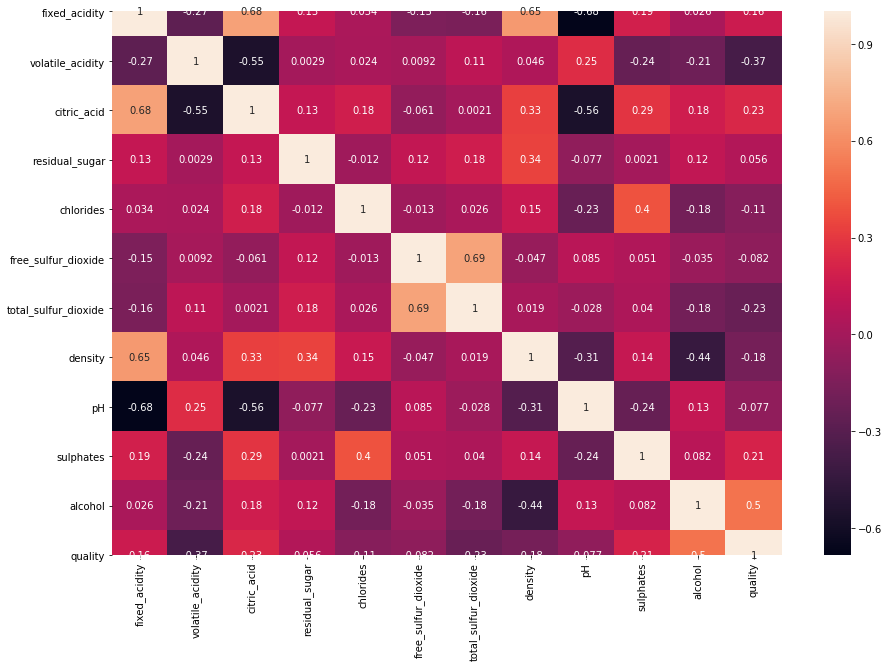

In [9]:
plt.subplots(figsize=(15,10))
sns.heatmap(train1.corr(),annot=True)

### Distribution of target variable

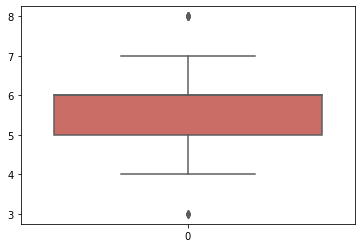

In [10]:
sns.boxplot(data=train1['quality'], palette="hls")

#### Preprocess data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

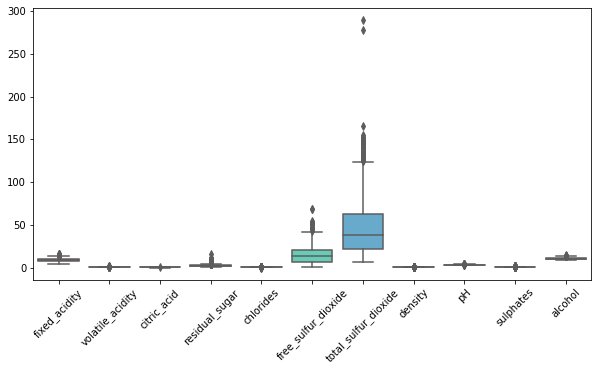

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train1.drop(columns=['quality']), palette='hls')
plt.xticks(rotation=45)

#### Analysis:
<ul>
    <li>By observing the boxplot, range of each features is different.</li>  
    <li>lets try normalizing the data</li>
</ul>



#### Normalization of features

In [12]:

y = train1['quality']
train1 = train1.loc[:, ~train1.columns.isin(['quality'])]

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(train1)
train1.loc[:,:] = scaled_values

train1['quality'] = y

### Distribution of features after normalizing the data.

In [13]:
train1.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.479339,0.00,0.068493,0.106845,0.149254,0.098940,0.588728,0.663793,0.137725,0.153846,5
1,0.283186,0.628099,0.00,0.116438,0.143573,0.358209,0.215548,0.512567,0.396552,0.209581,0.215385,5
2,0.283186,0.528926,0.04,0.095890,0.133556,0.208955,0.169611,0.527799,0.448276,0.191617,0.215385,5
3,0.584071,0.132231,0.56,0.068493,0.105175,0.238806,0.190813,0.603960,0.362069,0.149701,0.215385,6
4,0.247788,0.479339,0.00,0.068493,0.106845,0.149254,0.098940,0.588728,0.663793,0.137725,0.153846,5


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

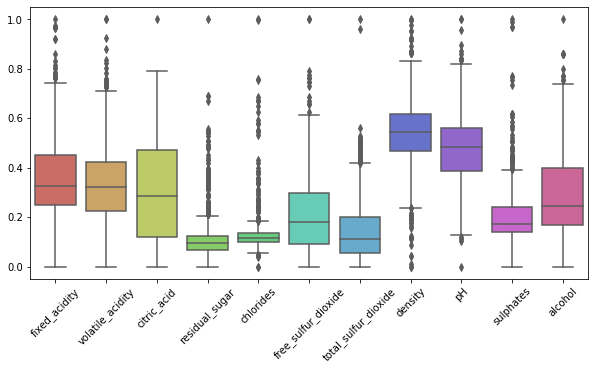

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(data=train1.drop(columns=['quality']), palette='hls')
plt.xticks(rotation=45)

#### Analysis
This looks good and can understand the data.

### Data Visualization after Normalization

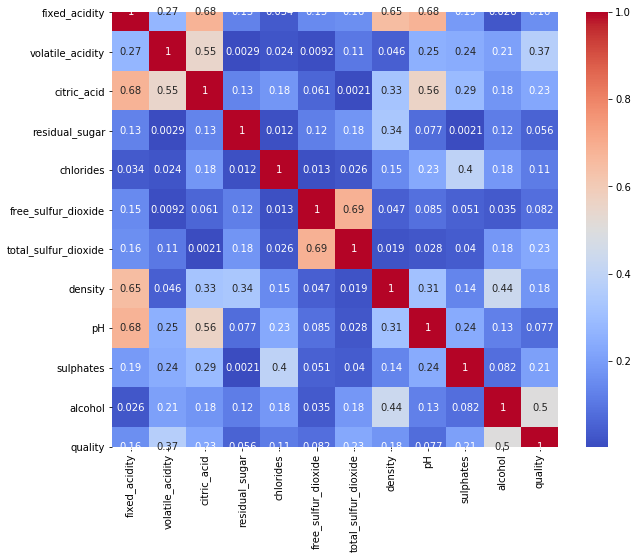

In [15]:
#Correlation between features

cor_fre = train1.corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(cor_fre, annot=True, cmap='coolwarm')

#### Analysis
<ul>
    <li>"Total sulfulr dioxide" and "free sulfur dioxide" has correlation of 0.69 b/w them</li>    
    <li>"pH" and "fixed acidity" | "citric acid" and "fixed acidity" both has correlation of 0.68 b/w them</li>
    <li>These features has high correlation which is >0.5</li>

</ul>

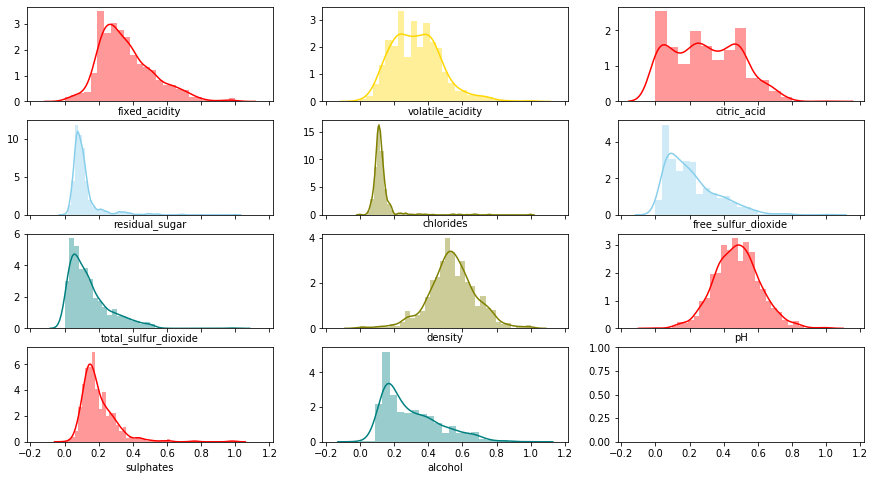

In [16]:
import random as rdm

fig, axes = plt.subplots(4, 3, figsize=(15, 8), sharex=True)
colr=["teal","olive","gold","red", "skyblue"]
sns.distplot(train1["fixed_acidity"], rug=False, color=rdm.choice(colr), ax=axes[0, 0])
sns.distplot(train1["volatile_acidity"], rug=False, color=rdm.choice(colr), ax=axes[0, 1])
sns.distplot(train1["citric_acid"], rug=False, color=rdm.choice(colr), ax=axes[0, 2])
sns.distplot(train1["residual_sugar"], rug=False, color=rdm.choice(colr), ax=axes[1, 0])
sns.distplot(train1["chlorides"], rug=False, color=rdm.choice(colr), ax=axes[1, 1])
sns.distplot(train1["free_sulfur_dioxide"], rug=False, color=rdm.choice(colr), ax=axes[1, 2])
sns.distplot(train1["total_sulfur_dioxide"], rug=False, color=rdm.choice(colr), ax=axes[2, 0])
sns.distplot(train1["density"], rug=False, color=rdm.choice(colr), ax=axes[2, 1])
sns.distplot(train1["pH"], rug=False, color=rdm.choice(colr), ax=axes[2, 2])
sns.distplot(train1["sulphates"], rug=False, color=rdm.choice(colr), ax=axes[3, 0])
sns.distplot(train1["alcohol"], rug=False,color=rdm.choice(colr), ax=axes[3, 1])
# i=0;
# j=0;
# for indx, val in enumerate(list(train1.columns)):
#     print(val)
#     if j==3:
#         j=0
#     sns.distplot(train1[val], rug=False, color=rdm.choice(colr), ax=axes[i, j])
#     if indx <= 2 :
#         j+=1;
        
#     if indx > 2 :
#         if j==0:
#             i+=1
#         j+=1

    

Analysis

Here all features are following normal distribution.

except some fluctuation in citric acid and volatile acidity

In [17]:
#sns.pairplot(train1, diag_kind='kde', palette='husl', hue='quality')

### Model Building 

## Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

In [19]:
X = train1.drop( "quality",axis=1)
y = train1["quality"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=50)

lr = LogisticRegression(random_state = 101,class_weight='balanced')
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=101, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred = lr.predict(X_test)

print("F1 Score :",f1_score(y_pred,y_test,average = "weighted"))
print('Report:\n',classification_report(y_test, y_pred))
print('accuracyscore: ',accuracy_score(y_test, y_pred))

F1 Score : 0.5099157870140095
Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.62      0.71      0.66       142
           6       0.52      0.35      0.42       127
           7       0.47      0.49      0.48        53
           8       0.00      0.00      0.00         2

    accuracy                           0.51       336
   macro avg       0.27      0.26      0.26       336
weighted avg       0.53      0.51      0.51       336

accuracyscore:  0.5119047619047619


In [22]:
# Confusion matrix
cn_matr=confusion_matrix(y_test, y_pred);

# df_cm = pd.DataFrame(cn_matr, range(6), range(6))
# plt.figure(figsize=(8,6))
# sns.set(font_scale=1.4)
# sns.heatmap(df_cm, annot=True, annot_kws={"size": 18}) 
# print(cn_matr)
# plt.show()

In [23]:

lr_test = lr.predict(test1)

lr_pred = pd.DataFrame(columns=["id",'quality'])
lr_pred['id']= testIds
lr_pred['quality']= lr_test

lr_pred.head()


,id,quality
0,1121,7
1,1122,5
2,1123,5
3,1124,5
4,1125,7


In [24]:
# after train
lr_qt_count = lr_pred['quality'].value_counts()
qt_counts = pd.DataFrame({'Quality': list(lr_qt_count.index), 'total_Frequency': lr_qt_count})
qt_counts


,Quality,total_Frequency
5,5,347
7,7,122
8,8,10


In [25]:
lr_pred.to_csv('lr_final.csv',index=False)
from IPython.display import FileLink
FileLink(r'lr_final.csv')

D:\learn\Data Science\project\Final Capstone Project\Predict the quality of Red Wine\my-project\lr_final.csv

## Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtc = DecisionTreeClassifier(random_state = 101,class_weight='balanced')

dtc = dtc.fit(X_train,y_train)

y_pred = dtc.predict(X_test)

In [28]:
print("F1 Score :",f1_score(y_pred,y_test,average = "weighted"))
print('Report: \n',classification_report(y_test, y_pred))
print('accuracyscore: ',accuracy_score(y_test, y_pred))

F1 Score : 0.5793100637296534
Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.17      0.20      0.18        10
           5       0.66      0.65      0.65       142
           6       0.55      0.61      0.58       127
           7       0.60      0.45      0.52        53
           8       0.00      0.00      0.00         2

    accuracy                           0.58       336
   macro avg       0.33      0.32      0.32       336
weighted avg       0.59      0.58      0.58       336

accuracyscore:  0.5803571428571429


In [29]:
confusion_matrix(y_test, y_pred)

array([[ 0,  0,  1,  1,  0,  0],
       [ 0,  2,  5,  2,  1,  0],
       [ 2,  7, 92, 38,  3,  0],
       [ 0,  3, 34, 77, 12,  1],
       [ 0,  0,  8, 19, 24,  2],
       [ 0,  0,  0,  2,  0,  0]], dtype=int64)

In [30]:
dtc_test = dtc.predict(test1)
dtc_pred = pd.DataFrame(columns=["id",'quality'])
dtc_pred['id']= testIds
dtc_pred['quality']= dtc_test
dtc_pred

,id,quality
0,1121,6
1,1122,7
2,1123,7
3,1124,6
4,1125,7
...,...,...
474,1595,6
475,1596,6
476,1597,6
477,1598,6


In [31]:
dtc_pred.to_csv('dtc_final.csv',index=False)
from IPython.display import FileLink
FileLink(r'dtc_final.csv')

D:\learn\Data Science\project\Final Capstone Project\Predict the quality of Red Wine\my-project\dtc_final.csv

## Random Forest Implementation

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
# n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
# for estimator in n_estimators:

rfc = RandomForestClassifier(n_estimators=128,max_depth=12, random_state=101,class_weight='balanced')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=128, n_jobs=None, oob_score=False,
                       random_state=101, verbose=0, warm_start=False)

In [56]:
y_pred = rfc.predict(X_test)
print("F1 Score :",f1_score(y_pred,y_test,average = "weighted"))
print('Report: \n',classification_report(y_test, y_pred))
print('accuracyscore: ',accuracy_score(y_test, y_pred))

F1 Score : 0.7701935291221007
Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.77      0.89      0.82       142
           6       0.72      0.75      0.73       127
           7       0.79      0.57      0.66        53
           8       0.00      0.00      0.00         2

    accuracy                           0.75       336
   macro avg       0.38      0.37      0.37       336
weighted avg       0.72      0.75      0.73       336

accuracyscore:  0.75


In [35]:
confusion_matrix(y_test, y_pred)

array([[  0,   0,   1,   1,   0,   0],
       [  0,   0,   7,   3,   0,   0],
       [  0,   0, 125,  16,   1,   0],
       [  0,   0,  25,  94,   8,   0],
       [  0,   0,   3,  20,  30,   0],
       [  0,   0,   0,   1,   1,   0]], dtype=int64)

In [36]:
rfc_test = rfc.predict(test1)
rfc_pred = pd.DataFrame(columns=["id",'quality'])
rfc_pred['id']= testIds
rfc_pred['quality']= rfc_test
rfc_pred

,id,quality
0,1121,6
1,1122,6
2,1123,6
3,1124,6
4,1125,6
...,...,...
474,1595,6
475,1596,5
476,1597,6
477,1598,5


In [37]:
# after train
rfc_qt_count = rfc_pred['quality'].value_counts()
qt_counts = pd.DataFrame({'Quality': list(rfc_qt_count.index), 'total_Frequency': rfc_qt_count})
qt_counts

,Quality,total_Frequency
6,6,313
5,5,141
4,4,23
7,7,2


In [38]:
rfc_pred.to_csv('rfc_final.csv',index=False)

FileLink(r'rfc_final.csv')

D:\learn\Data Science\project\Final Capstone Project\Predict the quality of Red Wine\my-project\rfc_final.csv

In [39]:
import pickle

In [40]:
pickle.dump(rfc,open('model.pkl','wb'))

In [41]:
model=pickle.load(open('model.pkl','rb'))

In [42]:
model.predict([[7.4,0.70,0.04,1.9,0.076,11.0,34,0.9,3.50,0.56,9.4]])

array([6], dtype=int64)